In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

import matplotlib
from pcygni_5 import PcygniCalculator
import astropy.units as units
import astropy.constants as csts
from scipy.interpolate import interp1d
import lmfit
import time
import pickle
import corner

#My plot style to standardize my plot esthetics
def reset_plt(ticksize,fontsize):
    #plt.style.use('seaborn-white')
    plt.rcParams['xtick.labelsize'] = ticksize
    plt.rcParams['ytick.labelsize'] = ticksize
    plt.rcParams['font.size'] = fontsize
    plt.rcParams['mathtext.fontset'] = 'stix'
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['legend.facecolor'] = 'white'
    plt.rcParams['axes.formatter.limits'] = (-1,3)
    plt.rcParams['axes.linewidth'] = 2.25
    plt.rcParams['axes.grid'] = True
    plt.rcParams['grid.alpha'] = 0.6
    #plt.rcParams['pcolor.shading'] = 'nearest'
    

def put_ticks(this_fig,this_ax):
    this_ax.xaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'major', direction = 'in', width = 2.5, length = 12, zorder = 1, right = True)
    this_ax.xaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, top = True)
    this_ax.yaxis.set_tick_params(which = 'minor', direction = 'in', width = 1.5, length = 6, zorder = 1, right = True)
    dx = -3/72
    dy = -3/72
    y_offset = matplotlib.transforms.ScaledTranslation(0, dy, this_fig.dpi_scale_trans)
    x_offset = matplotlib.transforms.ScaledTranslation(dx, 0, this_fig.dpi_scale_trans)

    for label in this_ax.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + y_offset)

    for label in this_ax.yaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + x_offset)

In [4]:
import tarfile 
#file = tarfile.open(name='figure_4.tar.gz', mode='r')

In [5]:
#file.extractall('./Inclination')

In [6]:
#file.close()

In [7]:
# Grid points in distance and inclination (theta_jn)
XX = np.loadtxt('./Inclination/figure_4/incl_grid_pts.dat.gz')
YY = np.loadtxt('./Inclination/figure_4/dist_grid_pts.dat.gz')

# Posterior PDF values for the marginal distributions shown in Figure 4
gw_Z = np.loadtxt('./Inclination/figure_4/volumetric_marginal_posterior_pdf.dat.gz')
em_Z = np.loadtxt('./Inclination/figure_4/em_dist_prior_marginal_posterior_pdf.dat.gz')

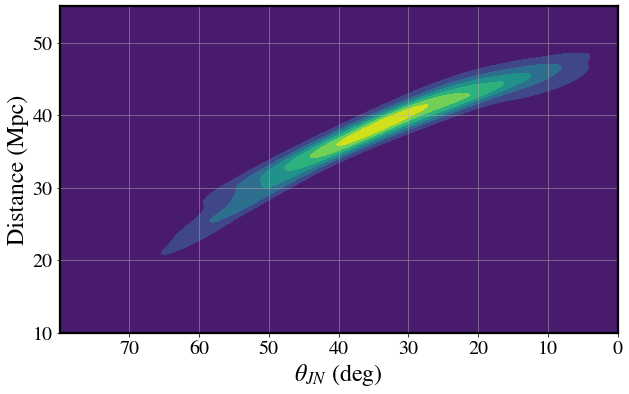

In [8]:
# Plot the posterior corresponding to the GW-only, volumetric prior
reset_plt(20,24)

plt.figure(figsize=(10,6))
plt.contourf(XX, YY, gw_Z)

#plt.contourf(XX, YY, gw_Z*ourprior)

#plt.title('Volumetric Prior')
plt.xlabel(r'$\theta_{JN}$ (deg)')
plt.ylabel('Distance (Mpc)');
xticks =  np.array([110, 120, 130, 140, 150, 160, 170, 180])
plt.xticks(xticks, 180-xticks); 

In [9]:
sigma = 7
mean = 159

sigma = 3
mean = 163
ourprior2 = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(XX-mean)**2/(2*sigma**2))
plt.contourf(XX, YY, ourprior2*gw_Z*d_theta_jn*d_dist/norm)
#np.mean()

NameError: name 'd_theta_jn' is not defined

In [10]:
sigma = 0.6
mean = 45.26 #43.2 #43.08
ourprior = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(YY-mean)**2/(2*sigma**2))

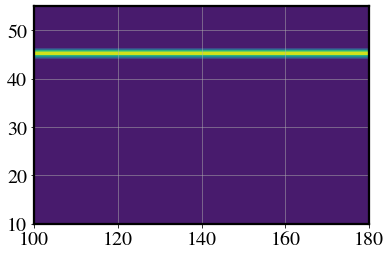

In [11]:
plt.contourf(XX, YY, ourprior)


In [74]:
np.max(gw_Z*ourprior)

0.002787709432382049

NameError: name 'd_theta_jn' is not defined

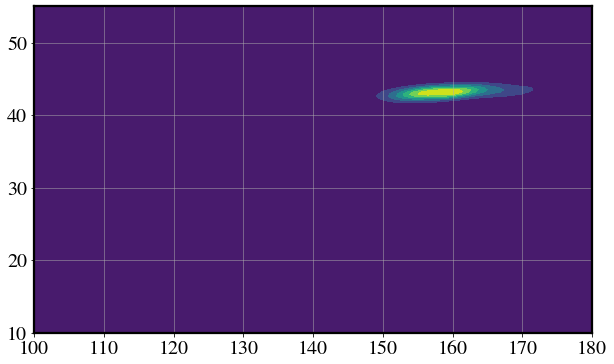

In [11]:
plt.figure(figsize=(10,6))

# Plot the posterior corresponding to the GW-only, volumetric prior
plt.contourf(XX, YY, gw_Z*ourprior)
#plt.contour(XX, YY, gw_Z*ourprior, colors='white', levels=[])
plt.contour(XX, YY, gw_Z*ourprior*d_theta_jn*d_dist/norm, colors='k', levels=[0.00072, 0.004], linestyles='dashed', color='white')

plt.ylim(40,50)#, plt.ylim(42,44)

plt.title('Volumetric Prior')
plt.xlabel(r'$\theta_{JN}$ (deg)')
plt.ylabel('Distance (Mpc)');

<ipython-input-42-eafbe71b84d4>:10: UserWarning: The following kwargs were not used by contour: 'color'
  plt.contour(XX, YY, gw_Z*ourprior_Mooley*d_theta_jn*d_dist/norm, colors='k', levels=[0.00072, 0.004], linestyles='dashed', color='white')


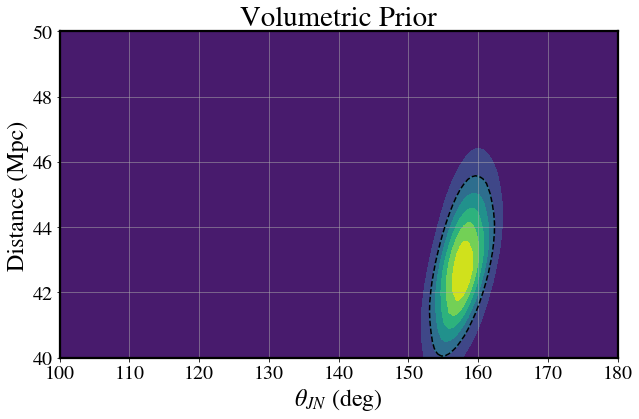

In [42]:
sigma = 3
mean = 180-22 #43.2 #43.08
ourprior_Mooley = 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(XX-mean)**2/(2*sigma**2))

plt.figure(figsize=(10,6))

# Plot the posterior corresponding to the GW-only, volumetric prior
plt.contourf(XX, YY, gw_Z*ourprior_Mooley)
#plt.contour(XX, YY, gw_Z*ourprior, colors='white', levels=[])
plt.contour(XX, YY, gw_Z*ourprior_Mooley*d_theta_jn*d_dist/norm, colors='k', levels=[0.00072, 0.004], linestyles='dashed', color='white')

plt.ylim(40,50)#, plt.ylim(42,44)

plt.title('Volumetric Prior')
plt.xlabel(r'$\theta_{JN}$ (deg)')
plt.ylabel('Distance (Mpc)');

In [77]:
np.sum(gw_Z*ourprior*d_theta_jn*d_dist/norm), np.max(gw_Z*ourprior*d_theta_jn*d_dist/norm)

(0.9935536287112144, 0.007472412202109638)

In [78]:
norm

0.060494605305218815

## 1D-distributions

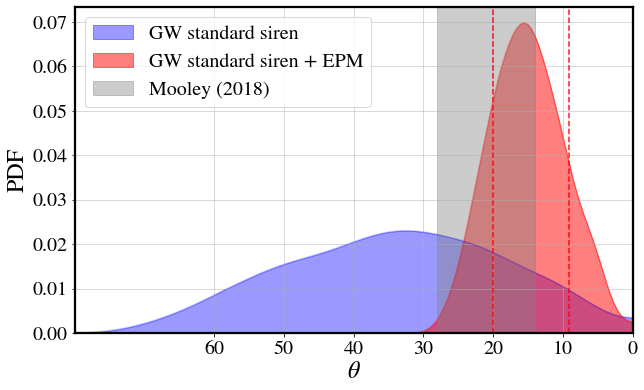

In [13]:
plt.figure(figsize=(10,6))
# Extract the 1-D grids for 1-D marginal distribution plots
theta_jns = XX[0, :]
d_theta_jn = theta_jns[1] - theta_jns[0]

dists = YY[:, 0]
d_dist = dists[1] - dists[0]

plt.plot(theta_jns, d_dist*np.sum(gw_Z, axis=0), color='blue', alpha=0.2)
plt.fill_between(theta_jns, d_dist*np.sum(gw_Z, axis=0), label='GW standard siren', color='blue', alpha=0.4)
y = d_dist*np.sum(gw_Z, axis=0)
norm = np.trapz(y, x = theta_jns)
y2 = np.array([np.trapz(y[:i], x = theta_jns[:i]) for i in range(len(theta_jns))])
#low, high = interp1d(y2, theta_jns)(0.169), interp1d(y2, theta_jns)(1-0.169)
#plt.fill_between([low, high], [0, 0], [1, 1], color='blue', alpha=0.1 )
#plt.axvline(interp1d(y2, theta_jns)(0.5), ls='--', color='blue', alpha=0.1)


y = d_dist*np.sum(gw_Z*ourprior, axis=0)
norm = np.trapz(y, x = theta_jns)
plt.plot(theta_jns, y/norm, color='red', alpha=0.2)
plt.fill_between(theta_jns, y/norm, color='red', alpha=0.5, label='GW standard siren + EPM')
#plt.plot(theta_jns, d_dist*np.sum(em_Z, axis=0), label='EM Distance Prior')
plt.xlim(theta_jns[0], theta_jns[-1])
plt.ylim(ymin=0)

plt.xlabel(r'$\theta$')
plt.ylabel('PDF');
plt.ticklabel_format(style='plain')

y2 = np.array([np.trapz(y[:i]/norm, x = theta_jns[:i]) for i in range(len(theta_jns))])
low, high = interp1d(y2, theta_jns)(0.169), interp1d(y2, theta_jns)(1-0.169)
#plt.fill_between([low, high], [0, 0], [1, 1], color='orange', alpha=0.2 )
#plt.axvline(interp1d(y2, theta_jns)(0.5), ls='--', color='orange')
plt.fill_between([180-28, 180-14], [0, 0], [1, 1], color='grey', alpha=0.4, label='Mooley (2018)' )

#plt.ylim(0, 0.09), plt.xlim(115, 180)
xticks =  np.array([120, 130, 140, 150, 160, 170, 180])
plt.xticks(xticks, 180-xticks)

plt.axvline(interp1d(y2, theta_jns)(0.169)  , color='red', ls='--', alpha=0.9)
plt.axvline(interp1d(y2, theta_jns)(1-0.169), color='red', ls='--', alpha=0.9)

#plt.axvline(interp1d(y2, theta_jns)(0.025)  , color='red', ls='--', alpha=0.9)
#plt.axvline(interp1d(y2, theta_jns)(1-0.025), color='red', ls='--', alpha=0.9)


plt.legend(loc='upper left', frameon=True, fontsize=20); 

#plt.savefig('Pictures/Inclination_prior_3.png', dpi=300)

(25.159346476680298, 15.123370317473757)

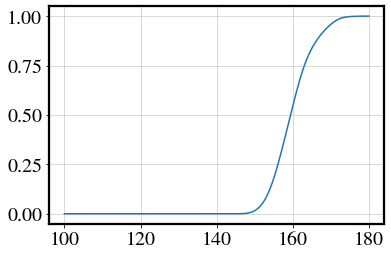

In [56]:
plt.plot( theta_jns , y2)
180-interp1d(y2, theta_jns)(0.169), 180-interp1d(y2, theta_jns)(1-0.169)

In [57]:
interp1d(y2, theta_jns)(0.169), interp1d(y2, theta_jns)(1-0.169)

(array(154.84065352), array(164.87662968))

In [58]:
interp1d(y2, theta_jns)(0.5)

array(159.4392541)

In [360]:
180-159.6, 180-155, 180-164.8

(20.400000000000006, 25, 15.199999999999989)

In [361]:
np.sum(gw_Z*d_theta_jn*d_dist), np.max(gw_Z*d_theta_jn*d_dist)

(1.0008179427262904, 0.0011335757552401074)

In [362]:
np.sum(gw_Z*ourprior*d_theta_jn*d_dist/norm), np.max(gw_Z*ourprior*d_theta_jn*d_dist/norm)

(1.0000050096441029, 0.01306370669155147)

<ipython-input-18-f7cdc060a360>:6: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(XX, YY, gw_Z*d_theta_jn*d_dist, levels=[0, 0.000064, 0.00032, 0.0016],
<ipython-input-18-f7cdc060a360>:9: UserWarning: The following kwargs were not used by contour: 'label'
  CS = plt.contour(XX, YY, gw_Z*d_theta_jn*d_dist, levels=[0, 0.000064, 0.00032, 0.0016],


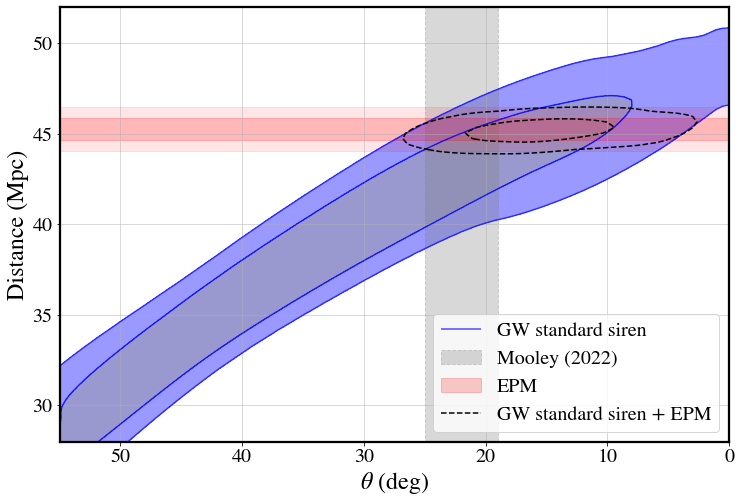

In [18]:
##### Plot the posterior corresponding to the GW-only, volumetric prior
reset_plt(20,24)

plt.figure(figsize=(12,8))

plt.contourf(XX, YY, gw_Z*d_theta_jn*d_dist, levels=[0, 0.000064, 0.00032, 0.0016], 
             label='GW standard siren', linestyles='dashed', colors=['white','blue','darkblue'], alpha=0.4 
            )
CS = plt.contour(XX, YY, gw_Z*d_theta_jn*d_dist, levels=[0, 0.000064, 0.00032, 0.0016], 
             label='GW standard siren', linestyles='-', colors=['lightblue','blue', 'blue','darkblue'], alpha=0.7 
            )
#plt.contour(XX, YY, gw_Z*d_theta_jn*d_dist, levels=[0.000062, 0.00032], label='GW standard siren', linestyles='dashed', 
#           facecolor='blue')
#plt.contourf(XX, YY, gw_Z*d_theta_jn*d_dist, levels=[1e-100, 0.000062], label='GW standard siren', linestyles='dashed', color='alpha')

#plt.fill_betweenx(np.linspace(10, 60, 100), 180-28, x2 = 180-14, color='grey', alpha=0.3, label='Mooley (2018)', ls='--')
plt.fill_betweenx(np.linspace(10, 60, 100), 180-25, x2 = 180-19, color='grey', alpha=0.3, label='Mooley (2022)', ls='--')

#plt.fill_between(np.linspace(105, 180, 100), y1=43.24+0.8, y2=43.24+1.2, color='red', alpha=0.1)
#plt.fill_between(np.linspace(105, 180, 100), y1=43.24+0.4, y2=43.24+0.8, color='red', alpha=0.2)
#plt.fill_between(np.linspace(105, 180, 100), y1=43.24-0.4, y2=43.24+0.4, color='red', alpha=0.4, label='EPM')
#plt.fill_between(np.linspace(105, 180, 100), y1=43.24-0.4, y2=43.24-0.8, color='red', alpha=0.2)
#plt.fill_between(np.linspace(105, 180, 100), y1=43.24-0.8, y2=43.24-1.2, color='red', alpha=0.1)

plt.fill_between(np.linspace(105, 180, 100), y1=mean+2*sigma, y2=mean-2*sigma, color='red', alpha=0.1)
plt.fill_between(np.linspace(105, 180, 100), y1=mean+sigma, y2=mean-sigma, color='red', alpha=0.2, label='EPM')

#plt.fill_between(np.linspace(105, 180, 100), y1=43.24+1.4, y2=43.24-1.4, color='red', alpha=0.1)
#plt.fill_between(np.linspace(105, 180, 100), y1=43.24-0.7, y2=43.24+0.7, color='red', alpha=0.2, label='EPM')
#plt.fill_between(np.linspace(105, 180, 100), y1=43.24-1.4, y2=43.24+1.4, color='red', alpha=0.1)
#plt.fill_between(np.linspace(105, 180, 100), y1=43.2-0.8 , y2=43.24-1.2, color='red', alpha=0.1)


CS2 = plt.contour(XX, YY, norm_prop, colors='k', levels=[0.00082, 0.0045], linestyles='dashed')
#, levels=3)#, levels=[1e-10])
#plt.contour(XX, YY, gw_Z*ourprior, colors='white', levels=3)#, levels=[0.0018, 0.003, 0.0045])#, levels=[1e-10])

#plt.contourf(XX, YY, gw_Z*ourprior)

#plt.title('Volumetric Prior')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel('Distance (Mpc)');
xticks =  np.array([110, 120, 130, 140, 150, 160, 170, 180])
plt.xticks(xticks, 180-xticks); 
#plt.xlim(105, 180), plt.ylim(16,54)
plt.xlim(125, 180), plt.ylim(28,52)
#plt.xlim(150, 180), plt.ylim(40,52)

#plt.axvline(interp1d(y2, theta_jns)(0.169)  , color='red', ls='--', alpha=0.9)
#plt.axvline(interp1d(y2, theta_jns)(1-0.169), color='red', ls='--', alpha=0.9)
#plt.axvline(interp1d(y2, theta_jns)(0.025)  , color='red', ls='--', alpha=0.9)
#plt.axvline(interp1d(y2, theta_jns)(1-0.025), color='red', ls='--', alpha=0.9)

#plt.axvline(interp1d(y2, theta_jns)(0.025)  , color='red', ls='--', alpha=0.9)
#plt.axvline(interp1d(y2, theta_jns)(1-0.025), color='red', ls='--', alpha=0.9)
labels = ['line1', 'GW standard siren', 'line3']
for i in range(len(labels))[1:-1]:
    CS.collections[i].set_label(labels[i])
    
labels = ['line1', 'GW standard siren + EPM', 'line3']
for i in range(len(labels))[1:-1]:
    CS2.collections[i].set_label(labels[i])

    
#plt.contour(XX, YY, ourprior2*gw_Z*d_theta_jn*d_dist/0.0158, colors='orange', ls='dotted', 
#            levels=[0, 0.0003, 0.0018], label='Hotokezaka')

#plt.title('GW Standard Siren - Volumetric Prior', fontsize=22)

plt.legend(loc='lower right', frameon=True, fontsize=20); 

plt.savefig('Pictures/Final/PDF/Nature_Figures_FigED3.jpeg', dpi=300)

In [10]:
373/299792.458 - 360/299792.458

4.3363332375759766e-05

1.0007857828551927

In [15]:
norm_prop = ourprior*gw_Z*d_theta_jn*d_dist/norm#/0.0158
#norm_prop = norm_prop/np.sum(norm_prop)
np.sum(norm_prop[norm_prop>0.0030]), np.sum(norm_prop[norm_prop>0.00052]), np.sum(norm_prop[norm_prop>0.0003]), np.max(norm_prop)

(0.6450209273561256,
 0.9486507360292795,
 0.9714738766768602,
 0.007912437591732652)

In [30]:
mu = 180-XX.flatten()[np.argmax(norm_prop)]

In [32]:
mu, mu-(180-np.max(XX[norm_prop>0.0045])), 180-np.min(XX[norm_prop>0.0045])-mu

(15.033557046979865, 5.369127516778519, 5.9060402684563655)

In [56]:
np.max(YY[norm_prop>0.0016]), np.min(YY[norm_prop>0.0016])

(45.63758389261745, 43.8255033557047)

In [34]:
np.sum(ourprior2*gw_Z*d_theta_jn*d_dist)/0.0158

1.0039943278431656

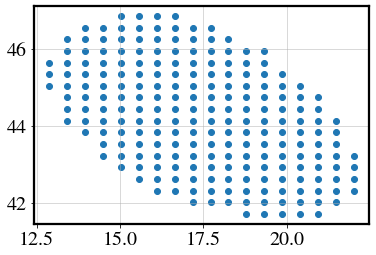

In [67]:
plt.scatter( 180-XX[norm_prop>0.0016], YY[norm_prop>0.0016] )

In [13]:
norm_prop = gw_Z*d_theta_jn*d_dist
np.sum(norm_prop[norm_prop>0.00032]), np.sum(norm_prop[norm_prop>0.000064]), np.max(norm_prop)

(0.6846770966897204, 0.9544879322213519, 0.0011335757552401074)

In [14]:
norm_prop = gw_Z*ourprior*d_theta_jn*d_dist/norm
np.sum(norm_prop[norm_prop>0.0039]), np.sum(norm_prop[norm_prop>0.00072])

(0.686798772216368, 0.9500106400277629)

In [15]:
np.max(norm_prop)

0.012296940673049692

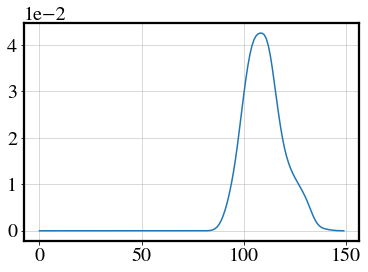

In [16]:
plt.plot(np.sum(norm_prop,axis=0))

In [27]:
180-np.min(XX[norm_prop>0.0041])-(180-XX.flatten()[np.argmax(norm_prop)]), 180-np.max(XX[norm_prop>0.0041])-(180-XX.flatten()[np.argmax(norm_prop)])

(2.6845637583892596, -1.6107382550335672)

In [28]:
180-np.min(XX[norm_prop>0.0041])

19.86577181208054

In [29]:
180-XX.flatten()[np.argmax(norm_prop)]

17.18120805369128

In [31]:
(180-XX.flatten()[np.argmin(norm_prop)])

35.43624161073825